## trying to improve the gradient slope fit

starting from the original gradient slope fit by Richard,

- swapped x and y in slope fit (!)
- added some visualisation and goodness of fit measure

needs seaborn plotting library ("conda install seaborn")

In [8]:
%matplotlib inline
from scipy import stats
import os
import pandas as pd
import numpy as np
import seaborn.apionly as sn
import matplotlib.pyplot as plt

In [9]:
path = './data/Outputs/Regs/'
selected2 = os.listdir(path)

In [10]:
#btw, this shows the documentation of a
sn.regplot?

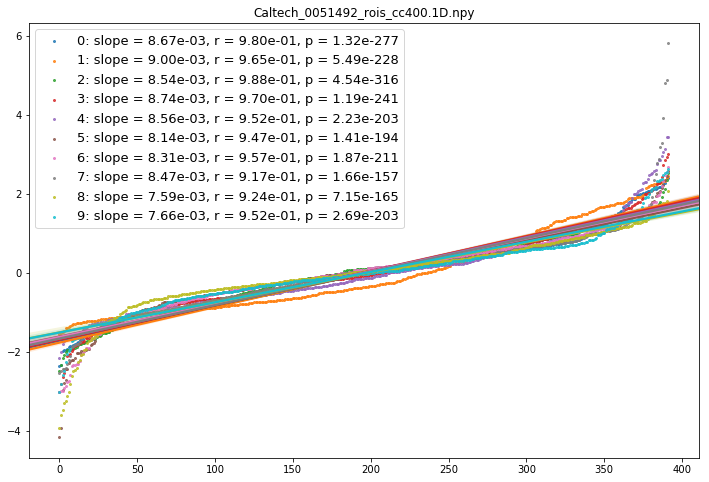

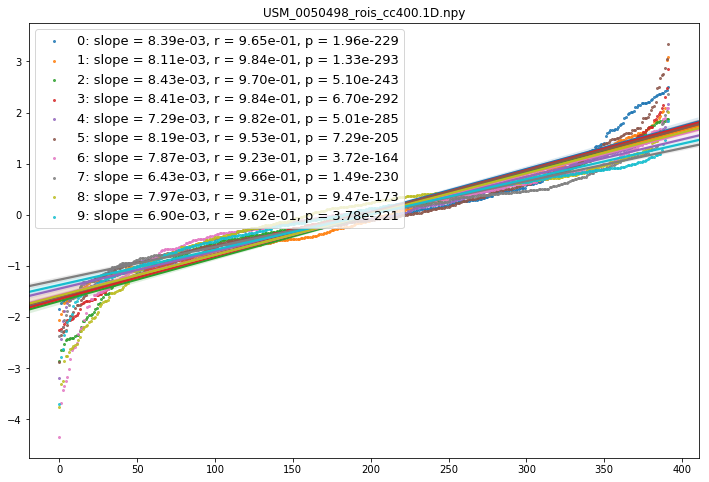

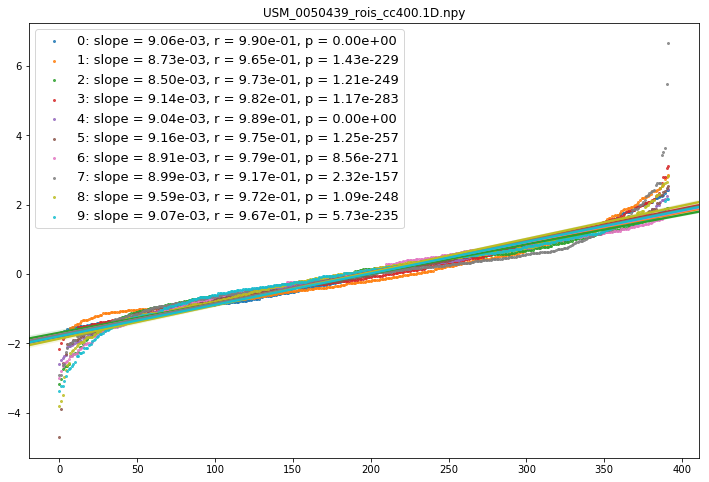

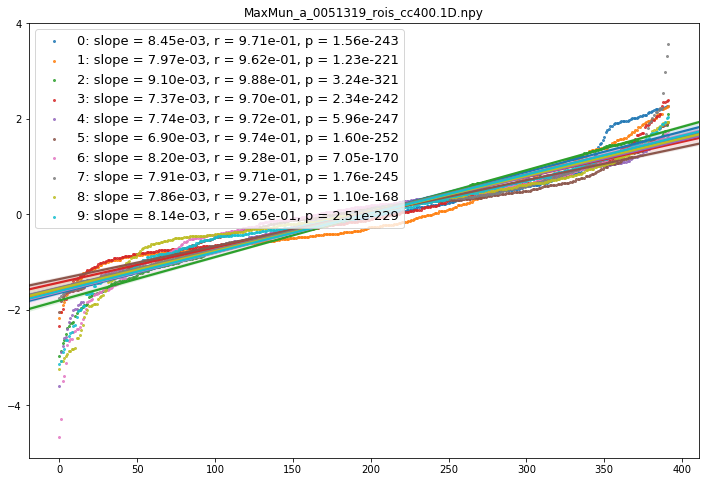

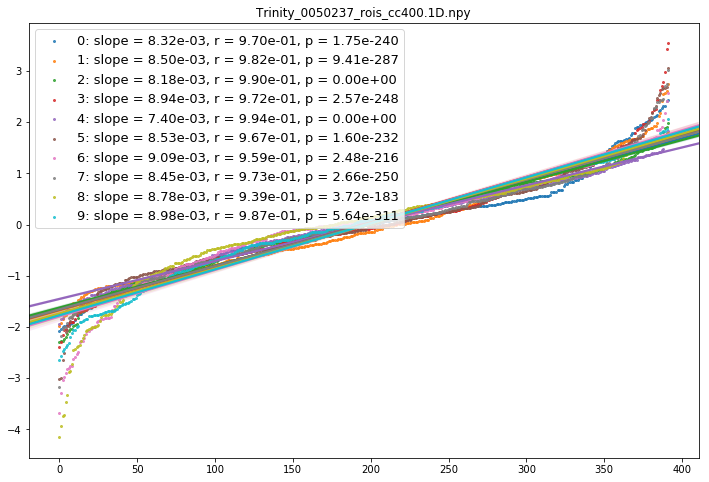

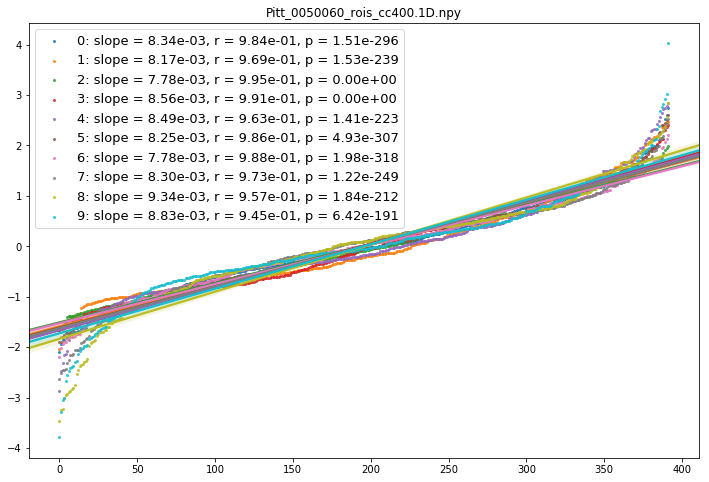

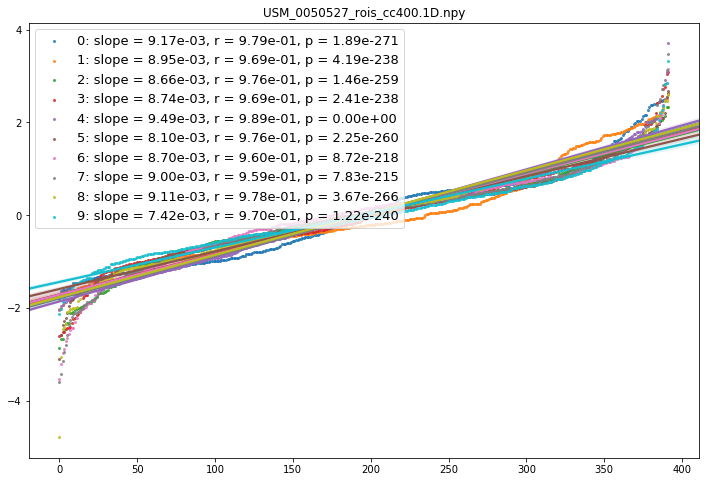

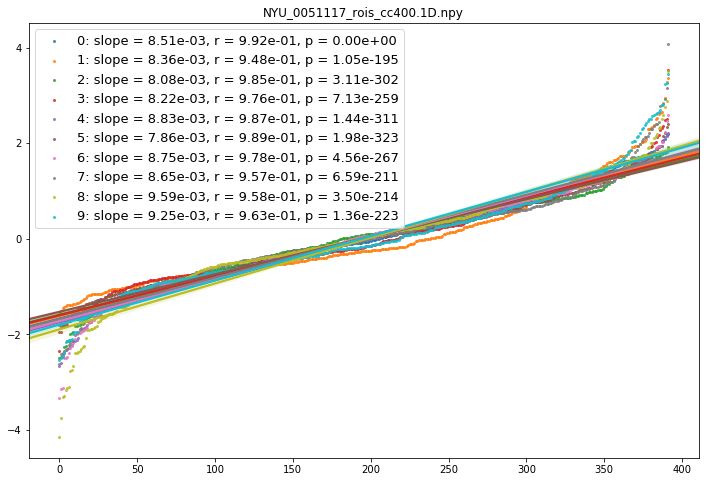

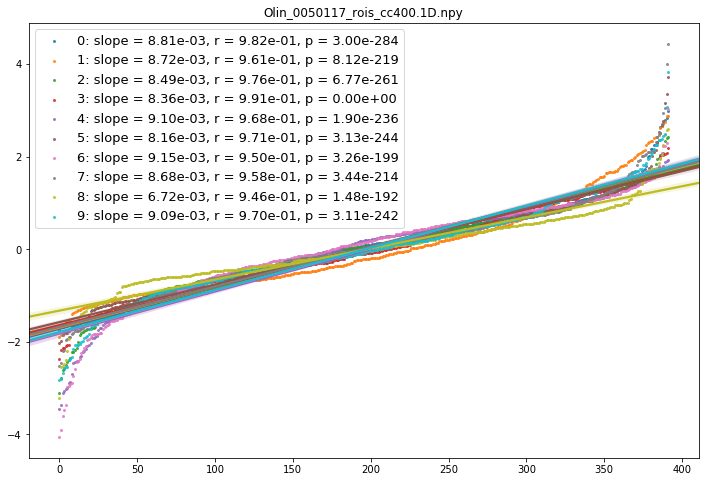

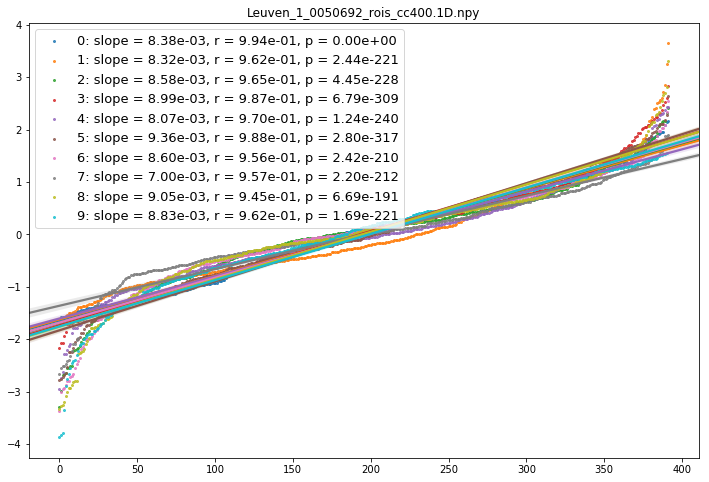

(10, 10)

In [16]:
grdnt_slope = []

#only run for first few for testing
testnum=10

for filename in selected2[:testnum]:
    temp = []
    # do we need a specific ordering of the nodes??
    grdnt = np.load(os.path.join(path,filename))
    x = np.arange(grdnt.shape[0])
    fig,ax = plt.subplots(figsize=(12,8))
    for ii in range(10):
        y = np.sort(grdnt[:,ii])# just sort in ascending order?
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        #visualize
        label = '{}: slope = {:.2e}, r = {:.2e}, p = {:.2e}'.format(ii,slope,r_value,p_value)
        sn.regplot(x,y,scatter_kws={'s': 4,'marker':'o'},ax=ax,label=label)
        temp.append(slope)
        
    ax.legend(loc='upper left',fontsize=13)
    ax.set_title(filename)
    plt.show()
    grdnt_slope.append(temp)
    
grdnt_slope = np.array(grdnt_slope)
grdnt_slope.shape

In [77]:
# little helper function to return the proper filelist with the full path
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

# get a list of inputs
from os import listdir
from os.path import isfile, join
import nibabel as nib
import nilearn
import nilearn.plotting

def rebuild_nii_individ(num,nfiles):
    """
    added additional argument to do only the first nfiles files
    """
    
    onlyfiles = [f for f in listdir_nohidden('./data/Outputs/Regs/') if isfile(join('./data/Outputs/Regs/', f))]

    for sub in onlyfiles[:nfiles]:

        data = np.load('./data/Outputs/Regs/%s' % sub)
        a = data[:,num].copy()
        #sorting a into partitions
        ll = len(a)
        b = np.argsort(a)[::-1]
        npart = 5
        idces = [b[j*ll//npart:(j+1)*ll//npart] for j in range(npart)]
        c = [a[idc] for idc in idces]
        
        nim = nib.load('cc400_roi_atlas.nii')
        imdat=nim.get_data()
        imdat_new = imdat.copy()

        #added loop over partitions
        counter = 0
        for idc,cc in zip(idces,c):
            imdat_newnew = imdat_new.copy()
            counter += 1
            acopy = np.zeros(a.shape)
            acopy[idc] = cc
            
            for n, i in enumerate(np.unique(imdat)):
                if i != 0:
                    imdat_newnew[imdat == i] = acopy[n-1] * 1# scaling factor. Could also try to get float values in nifti...

            nim_out = nib.Nifti1Image(imdat_newnew, nim.get_affine(), nim.get_header())
            nim_out.set_data_dtype('float32')
            # to save:
            # nim_out.to_filename('res.nii')
            nilearn.plotting.plot_epi(nim_out, cut_coords=(0,0,0),title='part {}'.format(counter))

/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:48: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/ipykernel/__main__.py:48: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
/home/bjoern/installed/anaconda3/envs/rbbrainhack/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

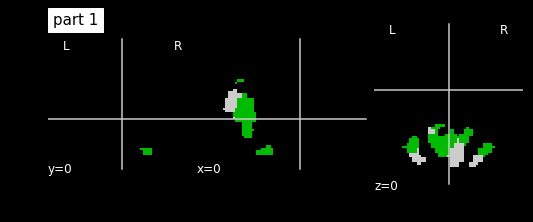

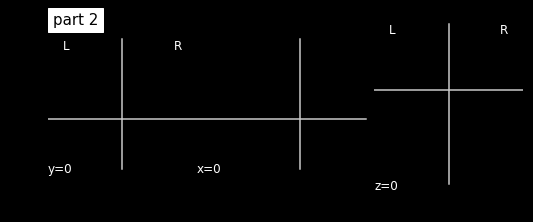

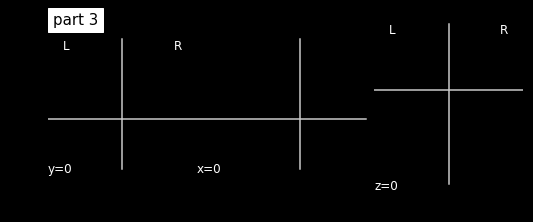

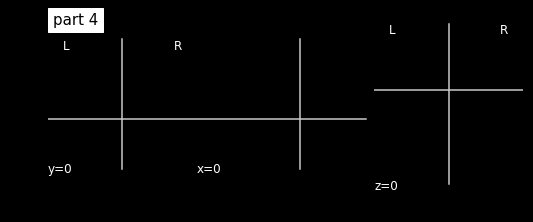

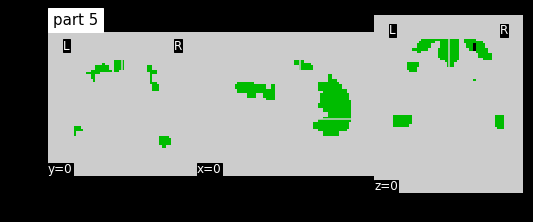

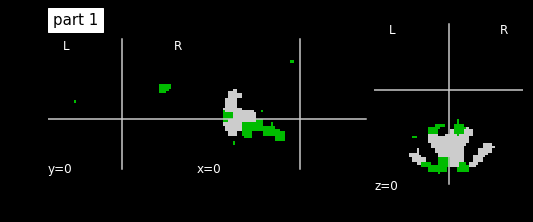

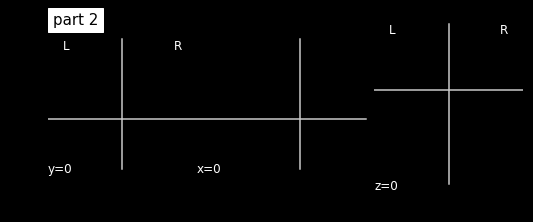

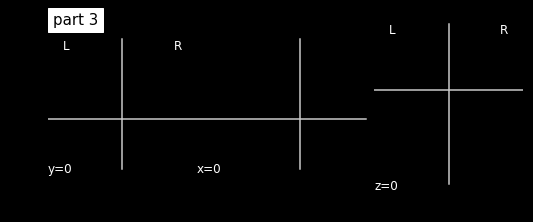

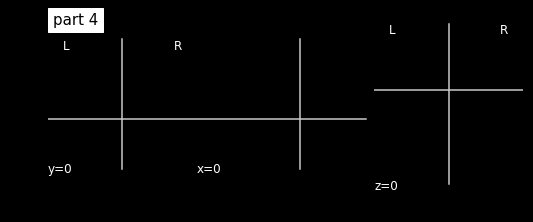

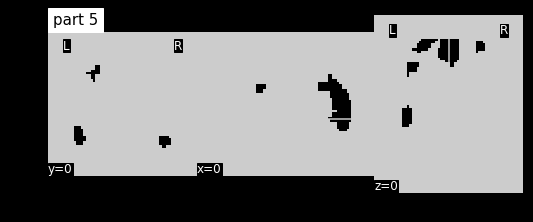

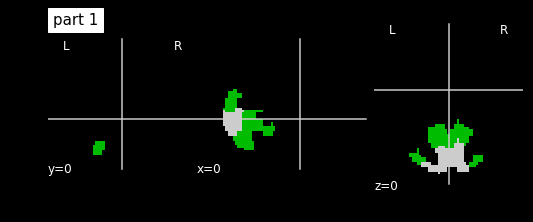

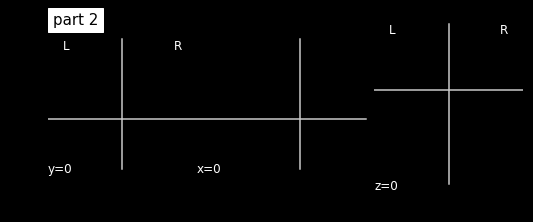

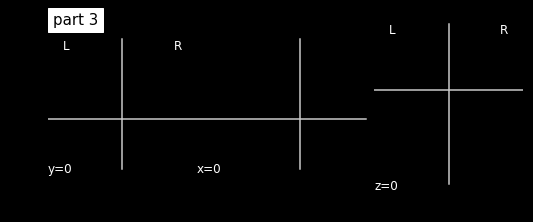

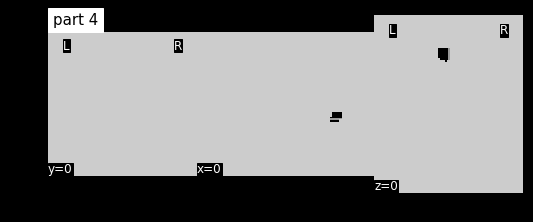

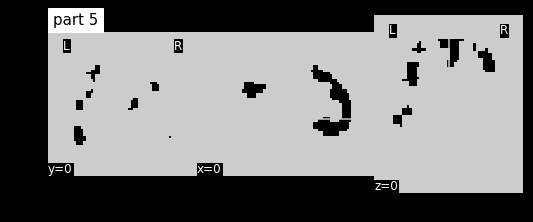

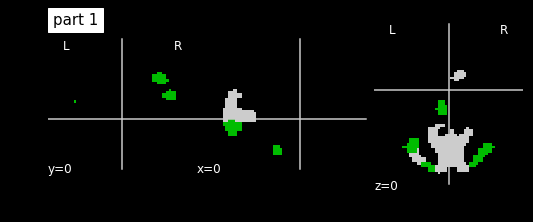

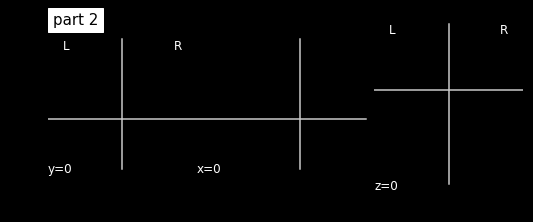

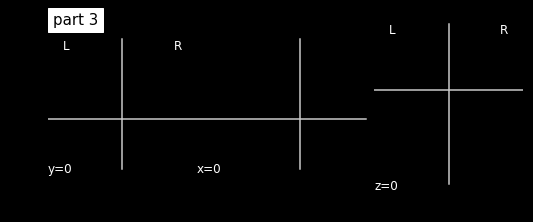

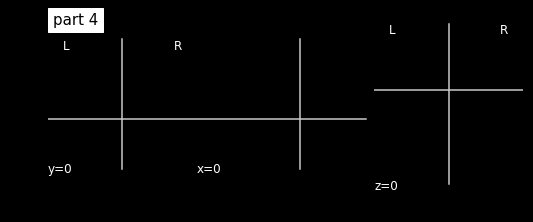

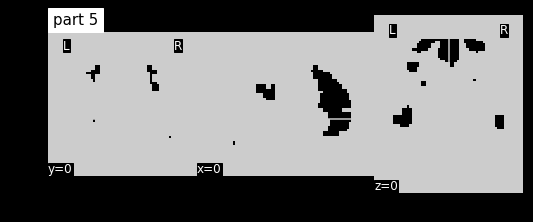

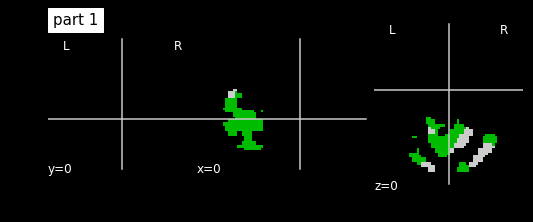

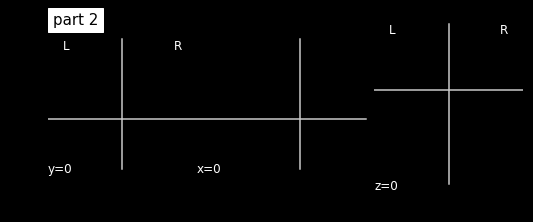

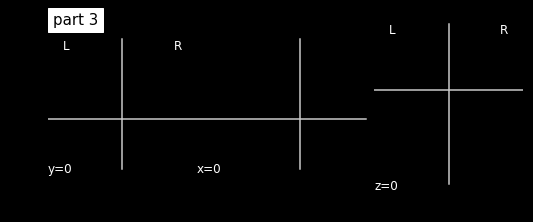

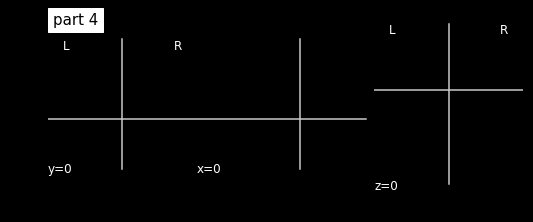

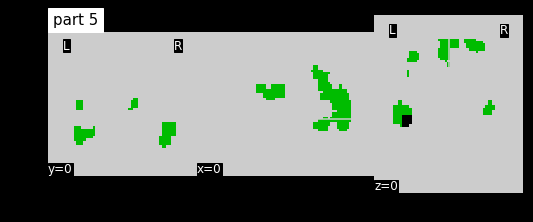

In [79]:
rebuild_nii_individ(0,5)

In [73]:
#testing sorting code with random numbers
a = np.random.randn(392)
ll = len(a)
b = np.argsort(a)[::-1]
npart = 10
idces = [b[i*ll//npart:(i+1)*ll//npart] for i in range(npart)]
c = [a[idc] for idc in idces]

In [74]:
idces,c

([array([138, 108, 262,  13,  47,  20, 310, 279, 157, 230,  38, 313, 300,
          63, 256, 197, 351, 273, 341, 352, 162, 175,  23, 231,   8, 243,
          89, 111,  78, 320,  61,  96,  12, 285, 290, 380, 104, 179, 178]),
  array([ 28, 202, 301, 217,  24, 207, 170, 316, 195, 327, 232, 287, 172,
         215, 144, 248,  10, 321,  92,   9, 371, 303, 314,  14,  27,  80,
         103, 163,  51, 189, 112, 378, 161, 244, 233, 336,  74,  62,  21]),
  array([ 99,  70, 365,   1, 159, 113, 388,  35, 274, 176, 389, 338, 223,
         107, 247, 219, 204, 225, 269, 289, 218, 134,  75,   4,  32, 361,
         360, 105, 324,   3, 208, 381,  98, 342, 193, 114, 328, 254, 305]),
  array([171, 205, 239, 325, 122, 118, 148, 143, 291,  73, 191, 390, 115,
         307,  81,  97,  40, 116, 235, 132, 250, 332,  60, 183, 257,  85,
         174, 266, 311,  33, 221, 331, 379,  67, 298,  41, 121, 292, 130]),
  array([ 59, 154,  87, 315, 370, 296, 391,  46, 259, 190, 295,  29,  53,
         237, 376,  88, 124, 1